# Predicción del precio de alquiler de la vivienda en la ciudad de Barcelona

Descripción del dataset:

|Columna|Descripción|Key|
|--|--|--|
|id|Identificador numérico de la vivienda||
|price|Precio de mercado de la vivienda||
|currency|Moneda|Euros / Mes|
|latitude|Latitud de las coordenadas geográficas de la vivienda||
|longitude|Longitud de las coordenadas geográficas de la vivienda||
|sq_meters|Metros cuadrados de la vivienda||
|sq_meters_built|Metros cuadrados construídos de la vivienda||
|rooms|Número de habitaciones||
|bathrooms|Número de baños||
|balcony|Indicador si la vivienda tiene balcón|1, 0|
|terrace|Indicador si la vivienda tiene terraza|1, 0|
|exterior|Indicador si la vivienda tiene una orientación exterior o interior en el edificio|1, 0|
|orientation|Orientación principal de la vivienda|norte, sur, este, oeste|
|floor|Piso de la vivienda||
|rooftop|Indicador si la vivienda es un ático|1, 0|
|elevator|Indicador si el edificio de la vivienda tiene ascensor|1, 0|
|doorman|Indicador si el edificio tiene portero|1,0|
|pool|Indicador si la vivienda cuenta con piscina o derecho de uso de piscina|1,0|
|ac|Indicador si tiene aire acondicionado|1,0|
|heating|Indicador si tiene calefacción|bomba, electric, gas, individual|
|year_built|Año de construcción||
|quality|Indicador de calidad de la vivienda|2 - En buen estado|
|city|Ciudad de la vivienda||
|neighborhood|Barrio de la vivienda||
|dist_city_center|Distancia en kilómetros al centro de la ciudad||
|furniture|Indicador si la vivienda cuenta con mobiliario|1: Sin Equipar; 2: Cocina Equipada; 3: Amueblado|
|garage|Indicador si la vivienda tiene garage|1, 0|
|property_type|Tipo de vivienda||
|garden|Indicador si la vivienda cuenta con jardín|1,0|
|closest_station|Nombre de la estación de metro más cercana||
|dist_closest_station|Distancia en kilómetros a la estación de metro más cercana||
|created_at|Fecha de creación del anuncio||
|last_seen|Fecha última en la que el anuncio fue publicado en la web||



### Exploratory Data Analysis

En éste punto queremos entender qué datos tenemos disponibles. Para ello realizaremos los siguientes puntos:

- Estadística descriptiva y calidad general de los datos: ¿Debemos hacer limpieza de los datos?, ¿Nos sirven todas las columnas?, ¿Nos sirven todas las instancias?, ¿Cómo debemos tratar los null values?
- Visualizaciones y análisis que ayuden a entender la distribución de las variables continuas y categorías independientemente: ¿Qué distribuciones siguen las variables continuas?, ¿Qué proporción de instancias tenemos para las variables categóricas?
- Visualizaciones y análisis que ayuden a entender la relación entre los atributos y la variable objetivo price: ¿Qué relación tienen las variables continuas con la variable objetivo price?, ¿Y las cariables categóricas?
- Alteración y creación de nuevas variables: ¿Podemos generar nuevas variables que se adapten más a nuestro objetivo que las que tenemos actualmente?
- Visualizaciones y análisis que ayuden a entender la posible correlación entre variables: ¿Cómo están relacionadas entre sí las variables interesantes para nuestro dominio?, ¿Debemos tener algún tipo de cuidado al respecto?

**Objetivos de éste punto:**

- Familiarizarnos con el dataset
- Generar un dataframe limpio, con las variables útiles para entrenar los modelos
- Entender qué posibles variables estén correlacionadas para evitar un sobreentrenamiento del modelo

#### Carga de librerías y dataset

In [3]:
# Library load
import os
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sn
import matplotlib.pyplot as plt

# Funciones para hacer cálculo estadístico
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn packages
from sklearn.preprocessing import StandardScaler # Análisis de PCA
from sklearn import metrics # Calcula métricas para un modelo
from sklearn import tree # Cálculo de decision trees
from sklearn.tree import DecisionTreeClassifier # Generación de modelos de decision tree
from sklearn.ensemble import BaggingClassifier # Generación de modelos de bagging
from sklearn.ensemble import RandomForestClassifier # Generación de modelo de random forest
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo

# Confusion matrix viz
from mlxtend.evaluate import confusion_matrix # Calcula la matriz de confusion 
from mlxtend.plotting import plot_confusion_matrix #plot de la matriz de confusión

# Ignoring warning messaages
import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook

In [4]:
raw_data = pd.read_csv('processed_renting_Barcelona (2).csv', delimiter = ',')
raw_data.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,536625,850,€/mes,41.401708,2.154077,52.0,55,2,1,NaN,...,Gràcia,2.026455,3.0,NaN,piso,NaN,Fontana,0.094111,9/1/2021 15:58,10/4/2021 6:01
1,545910,725,€/mes,41.407221,2.135569,32.0,37,2,1,1.0,...,Sant Gervasi - La Bonanova,3.582409,NaN,NaN,piso,NaN,Vallcarca,0.902561,9/2/2021 15:24,9/8/2021 12:29
2,570697,950,€/mes,41.411508,2.164608,NaN,72,3,1,NaN,...,El Baix Guinardó,2.663025,3.0,NaN,piso,NaN,Alfons X,0.188177,8/28/2021 23:52,8/28/2021 23:52
3,591588,750,€/mes,41.402256,2.140764,NaN,45,1,1,1.0,...,Sant Gervasi - La Bonanova,2.910067,3.0,NaN,piso,NaN,Lesseps,0.892917,8/29/2021 11:25,9/8/2021 12:29
4,610243,990,€/mes,41.405327,2.146929,NaN,45,1,1,NaN,...,Sarrià-Sant Gervasi,2.727149,3.0,NaN,piso,NaN,Lesseps,0.293784,8/30/2021 13:48,8/30/2021 14:04


#### Estadística descriptiva y calidad general de los datos

In [7]:
# Funciones útiles:
raw_data.describe() # Equivalente a función summary
raw_data.columns # Enumera las columnas del dataset
raw_data.isnull().sum() / len(raw_data) # Calcula la proporción de null values sobre todas las variables


id                      0.000000
price                   0.000000
currency                0.000000
latitude                0.000000
longitude               0.000000
sq_meters               0.415785
sq_meters_built         0.000000
rooms                   0.000000
bathrooms               0.000000
balcony                 0.590096
terrace                 0.773230
exterior                0.078335
orientation             0.566455
floor                   0.231240
rooftop                 0.927429
elevator                0.030228
doorman                 1.000000
pool                    0.962244
ac                      0.519407
heating                 0.356387
year_built              0.528817
quality                 0.000000
city                    0.000000
neighborhood            0.000000
dist_city_center        0.000000
furniture               0.147259
garage                  0.954717
property_type           0.000235
garden                  0.994001
closest_station         0.000000
dist_close

#### Visualizaciones y análisis que ayuden a entender la distribución de las variables continuas y categorías independientemente

KeyError: "['column_name'] not in index"

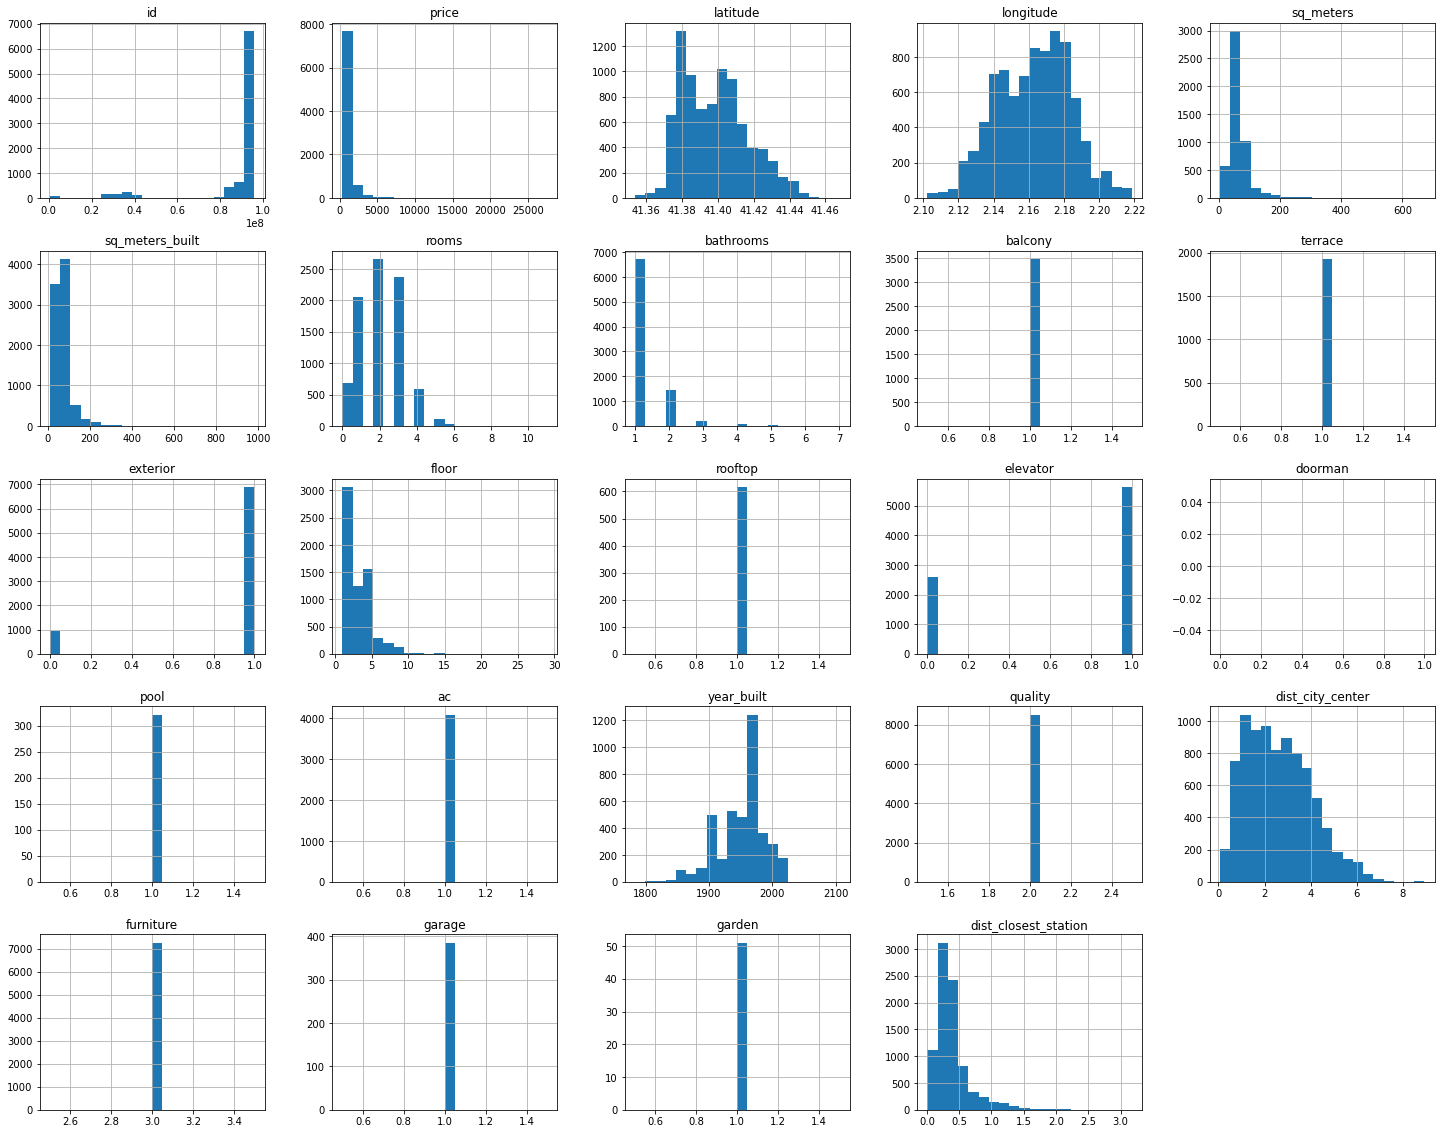

In [8]:
# Histogramas para entender la distribución de las variables
raw_data.hist(bins=20, figsize=(25, 20))
# Para variables categóricas podemos hacer la función groupby
raw_data[['column_name', 'price']].groupby('column_name').agg(
    # Number of instances per category
    category_count=('price', "count"),
    # Mean price
    mean_price=('price', "mean"),
    # Median price
    median_price=('price', "median"),
    # Min price
    min_price=('price', min),
    # Max price
    max_price=('price', max),
    # Standard deviation
    stantard_deviation=('price', "std"))

#### Visualizaciones y análisis que ayuden a entender la relación entre las variables categóricas y la variable objetivo price

ValueError: zero-size array to reduction operation minimum which has no identity

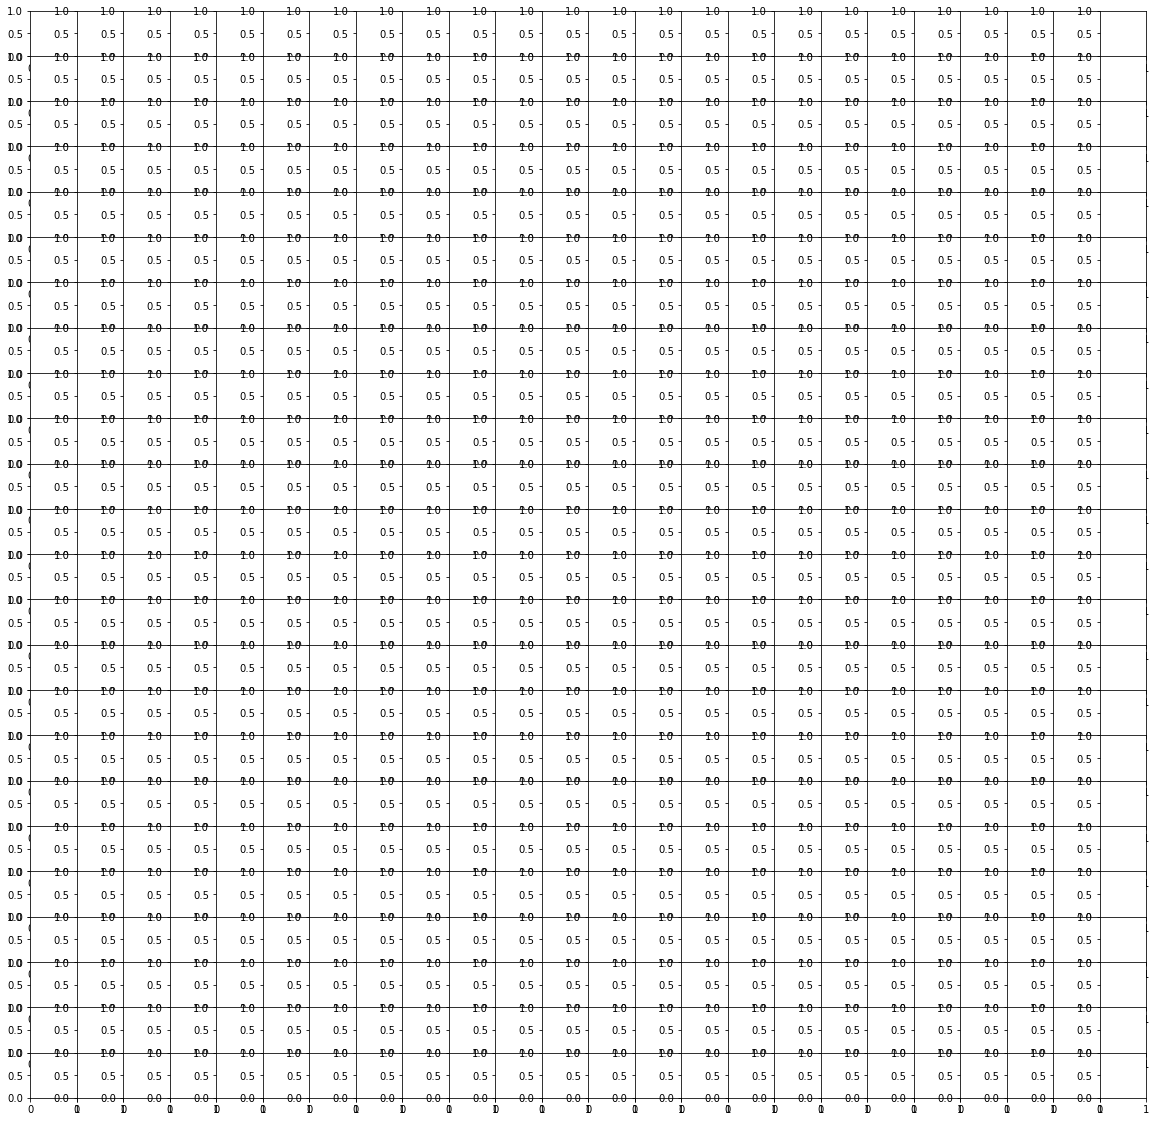

In [9]:
# Test ANOVA para 
model = ols('price ~ sq_meters', data=raw_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Scatter matrix, similar a la función pairs. Cuidado que solo sive para variables numéricas
pd.plotting.scatter_matrix(raw_data, alpha=0.2, figsize=(20, 20), diagonal='kde')

# Análisis de PCA. Cuidado que solo sive para variables numéricas y que hay que retirar la variable objetivo
StandardScaler().fit_transform(raw_data)

#### Alteración y creación de nuevas variables

In [10]:
dataset_numerico =  raw_data[['price', 'sq_meters_built', 'dist_city_center']]
dataset_numerico

,price,sq_meters_built,dist_city_center
0,850,55,2.026455
1,725,37,3.582409
2,950,72,2.663025
3,750,45,2.910067
4,990,45,2.727149
...,...,...,...
8497,907,49,1.317748
8498,950,125,4.063099
8499,950,48,0.288753
8500,926,51,3.909033


#### Visualizaciones y análisis que ayuden a entender la posible correlación entre variables

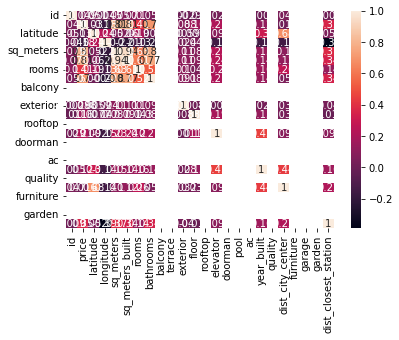

In [11]:
# Análisis de correlación
corrMatrix = raw_data.corr()
# Visualización de la matriz de correlación
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Modelo de Bagging

En éste punto crearemos nuestro primer modelo de bagging. Para ello realizaremos los siguientes puntos:

- Selección de la métrica de optimización: ¿Qué métrica debemos utilizar para optimizar y valorar la calidad de nuestros modelos?
- Split del dataset en training y test: ¿Cómo debemos separar los datos para entrenar y validar nuestro modelo?
- Optimización de hiperparámetros mediante Cross Validation: ¿Qué hiperparámetros deberíamos utilizar para entrenar nuestro modelo?
- Entrenamiento del modelo y análisis de los resultados: ¿Es bueno nuestro modelo?

**Objetivos de éste punto:**

- Definir cómo mediremos los resultados de nuestro modelo
- Generar y entrenar un modelo de datos

#### Selección de la métrica de optimización

- Tipos de scoring metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

#### Split del dataset en training y test

In [ ]:
X = dataset_numerico.drop(['price'], axis = 1)
y = dataset_numerico[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### Optimización de hiperparámetros mediante Cross Validation

- Decision tree classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Bagging classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [ ]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9,10,12,15], "min_samples_split":[2,5,10]}]

#instantiate the classifier
decision_tree_model = DecisionTreeClassifier()

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="accuracy")
grid_bag.fit(X_train, y_train)
grid_bag.best_estimator_

In [ ]:
# we enumerate the values to try
parameters = [{"n_estimators":[1,5,10,20,50,100,200]]

#instantiate the classifier
bagging_model = BaggingClassifier(decision_tree_model)

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=bagging_model, param_grid=parameters, scoring="accuracy")
grid_bag.fit(X_train, y_train)
grid_bag.best_estimator_

#### Entrenamiento del modelo y análisis de los resultados

In [ ]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingClassifier(DecisionTreeClassifier(max_depth = n, min_samples_split = m), n_estimators = n)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(bag, X_train, y_train, xv = 10, scoring="accuracy")
# Generación de las predicciones para el dataset de testing
y_pred = model.predict(X_test)
#error rate
error = 1.0 - metrics.accuracy_score(y_test, y_pred)
# Plot de la matriz de confusión
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred, binary = False))
plt.show()

# Ejemplo de modelo de Bagging

In [12]:
raw_data.head()

,id,price,currency,latitude,longitude,sq_meters,sq_meters_built,rooms,bathrooms,balcony,...,neighborhood,dist_city_center,furniture,garage,property_type,garden,closest_station,dist_closest_station,created_at,last_seen
0,536625,850,€/mes,41.401708,2.154077,52.0,55,2,1,NaN,...,Gràcia,2.026455,3.0,NaN,piso,NaN,Fontana,0.094111,9/1/2021 15:58,10/4/2021 6:01
1,545910,725,€/mes,41.407221,2.135569,32.0,37,2,1,1.0,...,Sant Gervasi - La Bonanova,3.582409,NaN,NaN,piso,NaN,Vallcarca,0.902561,9/2/2021 15:24,9/8/2021 12:29
2,570697,950,€/mes,41.411508,2.164608,NaN,72,3,1,NaN,...,El Baix Guinardó,2.663025,3.0,NaN,piso,NaN,Alfons X,0.188177,8/28/2021 23:52,8/28/2021 23:52
3,591588,750,€/mes,41.402256,2.140764,NaN,45,1,1,1.0,...,Sant Gervasi - La Bonanova,2.910067,3.0,NaN,piso,NaN,Lesseps,0.892917,8/29/2021 11:25,9/8/2021 12:29
4,610243,990,€/mes,41.405327,2.146929,NaN,45,1,1,NaN,...,Sarrià-Sant Gervasi,2.727149,3.0,NaN,piso,NaN,Lesseps,0.293784,8/30/2021 13:48,8/30/2021 14:04


Retiramos las variables que no nos importan para el modelo

In [13]:
rent_dataset = raw_data[['price', 'sq_meters_built', 'rooms', 'bathrooms', 'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating', 'year_built', 'neighborhood', 'dist_city_center', 'property_type', 'dist_closest_station']]
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station
0,850,55,2,1,NaN,NaN,1.0,norte,2.0,NaN,0.0,NaN,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111
1,725,37,2,1,1.0,NaN,1.0,sur,3.0,NaN,1.0,NaN,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561
2,950,72,3,1,NaN,NaN,1.0,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177
3,750,45,1,1,1.0,NaN,1.0,norte,4.0,NaN,1.0,NaN,NaN,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917
4,990,45,1,1,NaN,NaN,1.0,sur,3.0,NaN,1.0,NaN,NaN,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784


Podemos asumir que para algunas de las variables, los valores nulos son en realidad 0:

In [14]:
features_to_null = ['balcony', 'terrace', 'exterior', 'rooftop', 'elevator', 'pool', 'ac']
for i in range(0,len(features_to_null)):
   rent_dataset[features_to_null[i]].fillna(0, inplace = True) 
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784


Para otras, como por ejemplo la property_age, podemos transformarla a una variable categórica incluyendo los valores nulos como una categoría de unknown:

In [15]:
rent_dataset['property_age'] = 2022 - rent_dataset['year_built']
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,elevator,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,property_age
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,0.0,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,NaN
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,60.0
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,1.0,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,NaN
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,1.0,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,86.0
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,1.0,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,NaN


array([[<AxesSubplot:title={'center':'property_age'}>]], dtype=object)

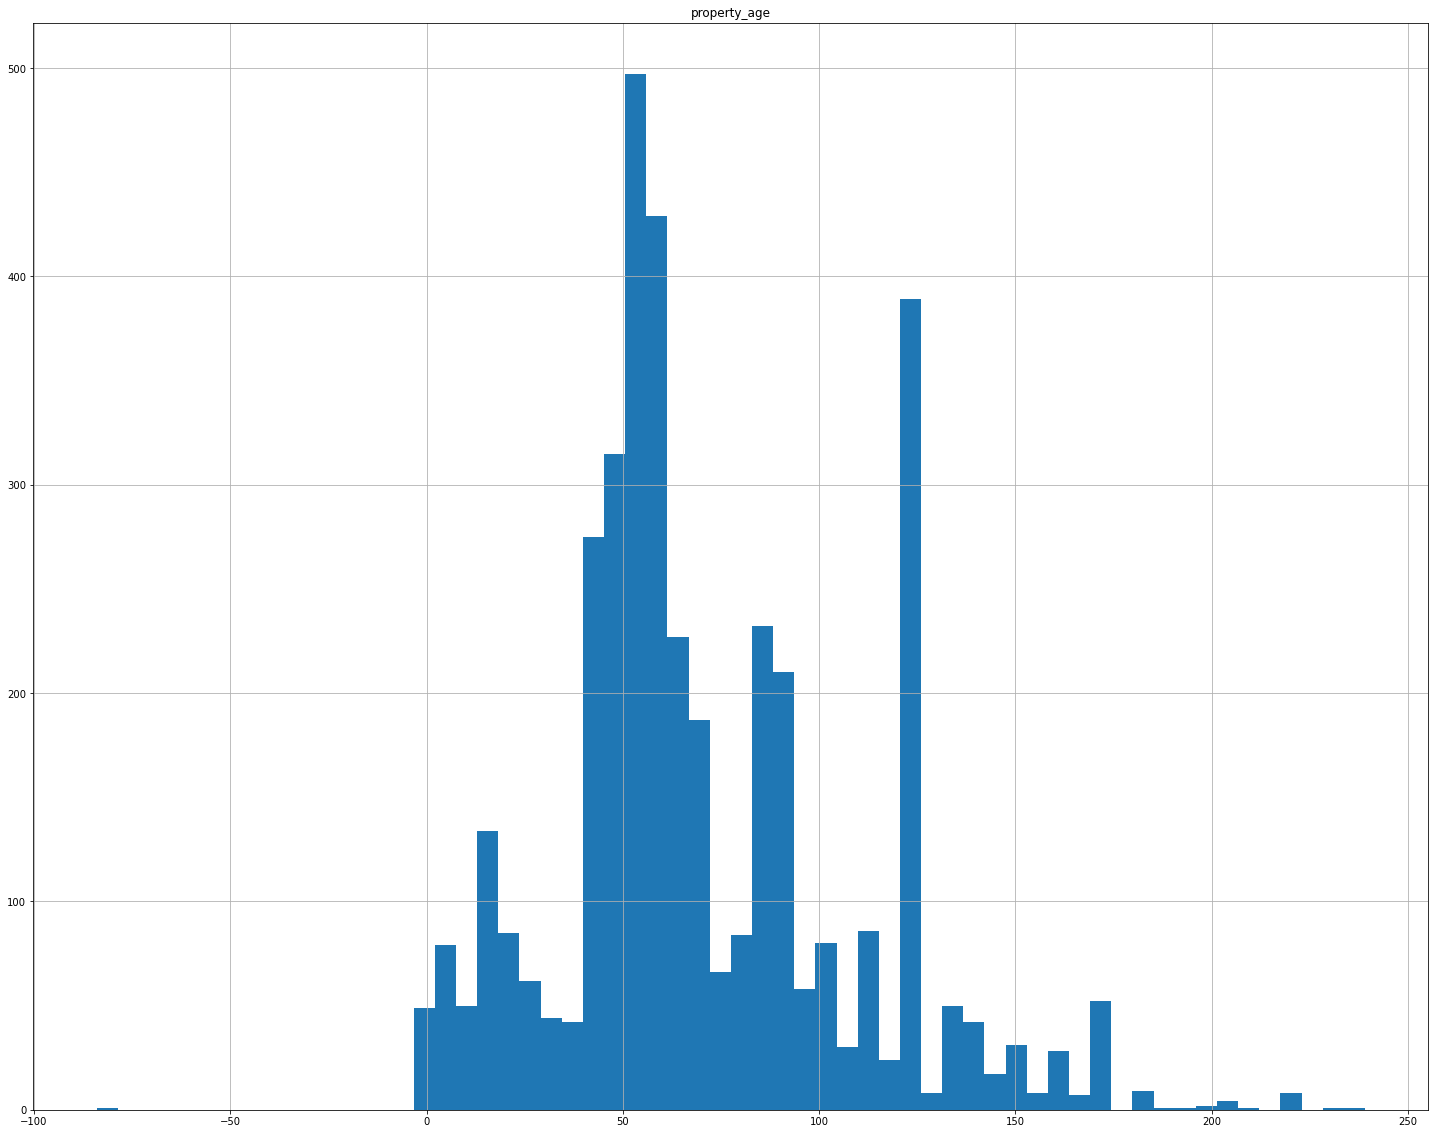

In [16]:
# Scatter matrix, similar a la función pairs. Cuidado que solo sive para variables numéricas
rent_dataset[['property_age']].hist(bins=60, figsize=(25, 20))

Apreciamos pequeños "clusters de viviendas, los cuales podemos agrupar en categorías según la edad de la vivienda:

In [17]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 40)):
        return "0 - 40"
    elif ((x >= 40) & (x < 70)):
        return "40 - 70"
    elif ((x >= 70) & (x < 120)):
        return "70 - 120"
    elif ((x >= 120) & (x < 150)):
        return "120 - 150"
    elif ((x >= 150)):
        return "+150"
    else:
        return "Unknown"

func = np.vectorize(conditions)
rent_dataset['property_age_cat'] = func(rent_dataset['property_age'])
rent_dataset.head()

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,orientation,floor,rooftop,...,pool,ac,heating,year_built,neighborhood,dist_city_center,property_type,dist_closest_station,property_age,property_age_cat
0,850,55,2,1,0.0,0.0,1.0,norte,2.0,0.0,...,0.0,1.0,NaN,NaN,Gràcia,2.026455,piso,0.094111,NaN,Unknown
1,725,37,2,1,1.0,0.0,1.0,sur,3.0,0.0,...,0.0,1.0,NaN,1962.0,Sant Gervasi - La Bonanova,3.582409,piso,0.902561,60.0,40 - 70
2,950,72,3,1,0.0,0.0,1.0,NaN,4.0,0.0,...,0.0,1.0,NaN,NaN,El Baix Guinardó,2.663025,piso,0.188177,NaN,Unknown
3,750,45,1,1,1.0,0.0,1.0,norte,4.0,0.0,...,0.0,0.0,NaN,1936.0,Sant Gervasi - La Bonanova,2.910067,piso,0.892917,86.0,70 - 120
4,990,45,1,1,0.0,0.0,1.0,sur,3.0,0.0,...,0.0,0.0,gas,NaN,Sarrià-Sant Gervasi,2.727149,piso,0.293784,NaN,Unknown


Del dataset que tenemos, generamos un subset con valores numéricos únicamente:

In [18]:
cat_features = ['neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat']
rent_dataset_numeric = rent_dataset.drop(cat_features, axis = 1)
rent_dataset_numeric

,price,sq_meters_built,rooms,bathrooms,balcony,terrace,exterior,floor,rooftop,elevator,pool,ac,year_built,dist_city_center,dist_closest_station,property_age
0,850,55,2,1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,NaN,2.026455,0.094111,NaN
1,725,37,2,1,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,1962.0,3.582409,0.902561,60.0
2,950,72,3,1,0.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,NaN,2.663025,0.188177,NaN
3,750,45,1,1,1.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,1936.0,2.910067,0.892917,86.0
4,990,45,1,1,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,NaN,2.727149,0.293784,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497,907,49,0,1,0.0,1.0,1.0,9.0,0.0,1.0,0.0,0.0,1966.0,1.317748,0.285426,56.0
8498,950,125,1,1,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,1997.0,4.063099,0.534462,25.0
8499,950,48,2,1,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,1890.0,0.288753,0.261938,132.0
8500,926,51,2,1,1.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,NaN,3.909033,0.545561,NaN


Comprobamos que no hay nulls

In [19]:
rent_dataset_numeric_no_nulls = rent_dataset_numeric.drop(['year_built', 'property_age', 'floor'], axis = 1)
rent_dataset_numeric_no_nulls.isnull().sum() / len(rent_dataset_numeric_no_nulls)

price                   0.0
sq_meters_built         0.0
rooms                   0.0
bathrooms               0.0
balcony                 0.0
terrace                 0.0
exterior                0.0
rooftop                 0.0
elevator                0.0
pool                    0.0
ac                      0.0
dist_city_center        0.0
dist_closest_station    0.0
dtype: float64

Generamos el split

In [20]:
X = rent_dataset_numeric_no_nulls.drop(['price'], axis = 1)
y = rent_dataset_numeric_no_nulls[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Ejemplos de scoring parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

En este caso optamos por un R2.

Hacemos grid search con cross validation para encontrar los parámetros óptimos de nuestro modelo

In [21]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9], "min_samples_split":[2,5,10]}]

#instantiate the classifier
decision_tree_model = DecisionTreeClassifier()

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 9],
                          'min_samples_split': [2, 5, 10]}],
             scoring='r2')

In [23]:
grid_bag.best_params_

{'max_depth': 9, 'min_samples_split': 10}

In [24]:
# we enumerate the values to try
parameters = {"n_estimators":[1,5,10,20,50,100,200]}

#instantiate the classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 9, min_samples_split = 10)

#instantiate the classifier
bagging_model = BaggingClassifier(decision_tree_model)

# Grid search function
grid_bag = GridSearchCV(cv = 10, estimator=bagging_model, param_grid=parameters, scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 100}

A continuación, con los parámetros óptimos del modelo, procedemos a hacer un xvalidation para entender la performance del modelo:

In [25]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 9, min_samples_split = 10), n_estimators = 20)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
model = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [26]:
for i, score in enumerate(model["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.6156234925827277
Accuracy for the fold no. 1 on the test set: 0.45743957659728973
Accuracy for the fold no. 2 on the test set: 0.6997421614796837
Accuracy for the fold no. 3 on the test set: 0.45266763130207555
Accuracy for the fold no. 4 on the test set: 0.6241726932599352
Accuracy for the fold no. 5 on the test set: 0.4563060077603974
Accuracy for the fold no. 6 on the test set: 0.6581929594748392
Accuracy for the fold no. 7 on the test set: 0.3265309732271563
Accuracy for the fold no. 8 on the test set: 0.5011131475829875
Accuracy for the fold no. 9 on the test set: 0.42653066972651377


Nos encontramos con que hay mucha variación con los datos de entrenamiento (R2 de 0.35 o de 0.74). Ésto nos indica que hay mucha variación en los datos y que probablemente tengamos outlayers o grupos de instancias que no estamos prediciendo correctamente

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc664622340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6646229a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6494bceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc66462d100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc66462d460>],
 'means': []}

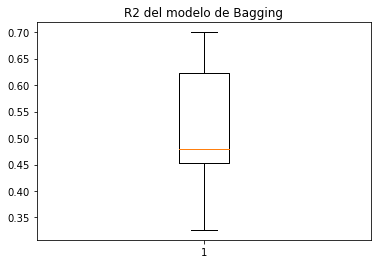

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Bagging')
ax1.boxplot(model["test_score"])

Generamos las predicciones y calculamos el resultado de validación:

In [28]:
bag = BaggingClassifier(DecisionTreeClassifier(max_depth = 9, min_samples_split = 10), n_estimators = 20)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                        min_samples_split=10),
                  n_estimators=20)

Error del modelo:

In [29]:
y_pred = bag.predict(X_train)
#error rate
metrics.r2_score(y_train, y_pred)

0.7137784573974738

Error en validación

In [30]:
y_pred = bag.predict(X_test)
#error rate
metrics.r2_score(y_test, y_pred)

0.5305050232904582